In [33]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [34]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Revision - using conditions

In [35]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

impute.fit(df.iloc[:,:].values)

df.iloc[:,:]  = impute.transform(df.iloc[:,:])

## Q1. How many free apps are there in ART_AND_DESIGN ?

In [36]:
df_pr = df[df['Category'] == 'ART_AND_DESIGN']

len(df_pr[df_pr['Type'] == 'Free'])

62

## Q2. How many apps are there in ART_AND_DESIGN which have rating more than 4.5 ?m

In [37]:
df_pr = df[df['Category'] == 'ART_AND_DESIGN']

len(df_pr[df_pr['Rating'] > 4.5])

22

## Q3. How many apps are there in FAMILY with rating more than 4.5 and Free ?

In [38]:
df_pr = df[df['Category'] == 'FAMILY']

df_pr = df_pr[df_pr['Rating'] > 4.5]

len(df_pr[df_pr['Type'] == 'Free'])

314

## Q4. List all the free apps with rating more than 4.5 and category is FAMILY.

In [39]:
df_pr = df[df['Type'] == 'Free']

df_pr = df_pr[df_pr['Rating'] > 4.5]

len(df_pr[df_pr['Category'] == 'FAMILY'])

314

In [40]:
result = df_pr[df_pr['Category'] == 'FAMILY']

for i in result.values:
    print(i[0])

Super ABC! Learning games for kids! Preschool apps
Candy Pop Story
Dog Run - Pet Dog Simulator
Puzzle Kids - Animals Shapes and Jigsaw Puzzles
No. Color - Color by Number, Number Coloring
Garden Fruit Legend
Piano Kids - Music & Songs
Duolingo: Learn Languages Free
Super ABC! Learning games for kids! Preschool apps
Drawing for Kids Learning Games for Toddlers age 3
Baby ABC in box! Kids alphabet games for toddlers!
Henry Danger Crime Warp
Fruit Cube Blast
Toddler Kids Puzzles PUZZINGO
Fuzzy Seasons: Animal Forest
Dog Run - Pet Dog Simulator
My Oasis - Calming and Relaxing Idle Clicker Game
Ninja Dash - Ronin Jump RPG
Monster High™ Minis Mania
Monica Toy TV
Sworkit Kids - Fitness Meets Fun
Crazy Colors: Bubbles Matching
Pino chess
Duolingo: Learn Languages Free
Animal Jam - Play Wild!
Dog Sim Online: Raise a Family
Color by Number - Draw Sandbox Pixel Art
Build a Bridge!
Find a Way: Addictive Puzzle
CompTIA Exam Training
Gymnastics Superstar - Spin your way to gold!
Hungry Hearts Diner:

# <font color = 'red'><U> Revision - Group_By</font></U>

## Q1. Name the apps in ART_AND_DESIGN with rating more than 4.5 in ascending order WRT Ratings

In [41]:
df_pr = df[df['Category'] == 'ART_AND_DESIGN']

df_pr = df_pr[df_pr['Rating'] > 4.5]

result = df_pr.sort_values(by = 'Rating', ascending=True)

len(result)

22

## Q2. Name the apps in ART_AND_DESIGN in descending order WRT Reviews ?

In [50]:
df[df['Reviews'] == '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [51]:
df.drop(10472, axis = 0, inplace = True)

In [52]:
df['Reviews'].astype(int)

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int32

In [54]:
df_pr = df[df['Category'] == 'ART_AND_DESIGN']
df_pr.sort_values(by = 'Reviews', ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
11,Name Art Photo Editor - Focus n Filters,ART_AND_DESIGN,4.4,8788,12M,"1,000,000+",Free,0,Everyone,Art & Design,"July 31, 2018",1.0.15,4.0 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
47,Little Teddy Bear Colouring Book Game,ART_AND_DESIGN,4.2,85,8.0M,"100,000+",Free,0,Everyone,Art & Design,"December 17, 2017",2.0.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,Pink Silver Bow Keyboard Theme,ART_AND_DESIGN,4.2,1120,9.2M,"100,000+",Free,0,Everyone,Art & Design,"July 12, 2018",6.7.12.2018,4.0.3 and up
46,Install images with music to make video withou...,ART_AND_DESIGN,4.6,1070,26M,"100,000+",Free,0,Everyone,Art & Design,"November 14, 2017",1.6,4.1 and up
33,Easy Origami Ideas,ART_AND_DESIGN,4.2,1015,11M,"100,000+",Free,0,Everyone,Art & Design,"January 6, 2018",1.1.0,4.1 and up
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9M,100+,Free,0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up


## Q3. Which Category is having maximum average rating ?

In [60]:
df.groupby('Category').mean()['Rating'].sort_values(ascending = False)

Category
EVENTS                 4.425000
EDUCATION              4.389103
ART_AND_DESIGN         4.360000
BOOKS_AND_REFERENCE    4.358442
PERSONALIZATION        4.348724
PARENTING              4.316667
BEAUTY                 4.303774
HEALTH_AND_FITNESS     4.292962
GAME                   4.290997
SOCIAL                 4.273220
SHOPPING               4.271538
WEATHER                4.257317
SPORTS                 4.253385
PRODUCTIVITY           4.243868
MEDICAL                4.240605
LIBRARIES_AND_DEMO     4.230588
HOUSE_AND_HOME         4.225000
AUTO_AND_VEHICLES      4.220000
BUSINESS               4.216522
FAMILY                 4.215974
PHOTOGRAPHY            4.203284
FOOD_AND_DRINK         4.200000
COMMUNICATION          4.195349
NEWS_AND_MAGAZINES     4.179505
FINANCE                4.163388
COMICS                 4.163333
LIFESTYLE              4.149215
TRAVEL_AND_LOCAL       4.145349
ENTERTAINMENT          4.126174
TOOLS                  4.093001
VIDEO_PLAYERS          4.092571

## Q4. How many apps are there in each category ?

In [66]:
df.groupby('Category').count()['Type'].sort_values(ascending=False)

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Type, dtype: int64

## How many free apps are there in each category ?

In [75]:
df_pr = df[df['Type'] == 'Free']

df_pr.groupby('Category').count()['Type'].sort_values(ascending=False)

Category
FAMILY                 1781
GAME                   1061
TOOLS                   765
BUSINESS                446
PRODUCTIVITY            396
LIFESTYLE               363
SPORTS                  360
COMMUNICATION           360
MEDICAL                 354
FINANCE                 349
HEALTH_AND_FITNESS      325
PHOTOGRAPHY             313
PERSONALIZATION         309
SOCIAL                  292
NEWS_AND_MAGAZINES      281
SHOPPING                258
TRAVEL_AND_LOCAL        246
DATING                  227
BOOKS_AND_REFERENCE     203
VIDEO_PLAYERS           171
EDUCATION               152
ENTERTAINMENT           147
MAPS_AND_NAVIGATION     132
FOOD_AND_DRINK          125
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        82
WEATHER                  74
EVENTS                   63
ART_AND_DESIGN           62
COMICS                   60
PARENTING                58
BEAUTY                   53
Name: Type, dtype: int64

In [78]:
df.groupby('Type').count()['Category']

Type
Free    10040
Paid      800
Name: Category, dtype: int64

In [24]:
# df[df['Category'] == '1.9']
df.drop(10472, inplace = True)

<AxesSubplot:xlabel='Category'>

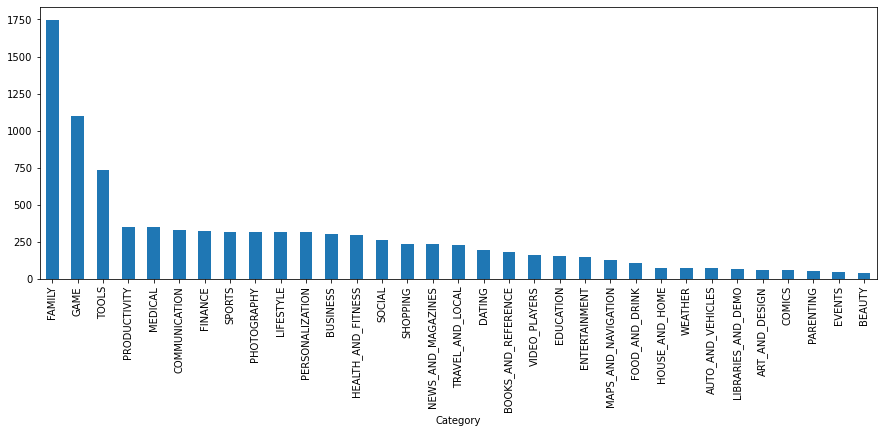

In [42]:
df.groupby('Category').count()['Rating'].sort_values(ascending = False).plot(kind = 'bar', figsize = (15,5))

## How many paid apps in each category ?

In [35]:
f = 0
for i in df['Type']:
    if(i == 'Free'):
        f += 1
print('There are', round((f/(f+p))*100, 2), '% free apps', end = ' and ')

p = 0
for i in df['Type']:
    if(i == 'Paid'):
        p += 1
print('There are', round((p/(p+f))*100, 2), '% paid apps')

There are 92.62 % free apps and There are 7.38 % paid apps


<AxesSubplot:xlabel='Category'>

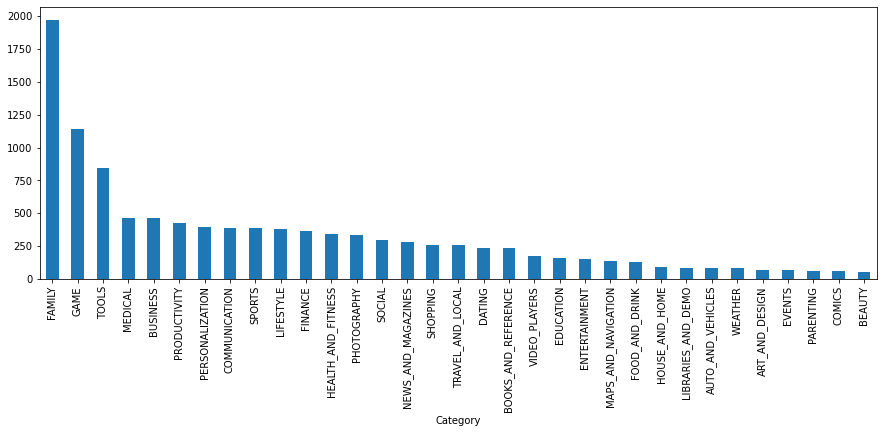

In [40]:
df.groupby('Category').count()['Reviews'].sort_values(ascending=False).plot(kind = 'bar', figsize = (15,5))